## Observations and Insights 

Three inferences can be made about the data below.

The first inference is that the final tumor volume in 'Capomulin' and 'Ramicane' regimens seem to be smaller than in the 'Infubinol' and 'Ceftamin' regimens. This could lead to the inference that the regimens 'Capomulin' and 'Ramicane' were more successful at reducing tumor sizes than the other two. However, we would want to assess the overall change in tumor volume and compare any other factors that may have an infuence on these results to make any conclusions. Another thing to note is that the 'Capomulin' and 'Ramicane' regimens were used  on more mice than any others.

The second inference can be made when looking at the correlations shown below when looking at the
'Capomulin' regimen. In once mouse there is a negative correlation between amount of time on the regimen, showing that with more time on the regimen, the tumor size dcreased. We could infer that the regimen was successful in reducing the tumor size in that mouse. We should compare these results to the rest of the mice in order to draw a stronger conclusion.

Third, When we compare mouse weight to tumor size in all mice within the 'Capomulin' regimen, we see that there is a positive correlation with weight and tumor size, showing that the higher the weight of the mouse, the larger the tumor size. The correlation is close to strong at 0.84 correlation coefficient. We could infer that tumor size is impacted by mouse weight in some way, although correlation does not equal causation. It would also be interesting to compare the amount of reduction in mice with higher weight versus lower weight between regimens do see if there is any difference over time.


In [234]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
#combined_study_data.head()

In [235]:
# Count number of mice
mice = combined_study_data['Mouse ID'].value_counts()
num_mice = len(mice)
#num_mice

In [236]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_study_data.loc[combined_study_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
#duplicate_mice


In [237]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = combined_study_data[combined_study_data['Mouse ID']== 'g989'] 
#g989


In [238]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = combined_study_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
clean_mice_data = clean_mice_data.reset_index()
#clean_mice_data

In [239]:
clean_g989 = clean_mice_data[clean_mice_data['Mouse ID']== 'g989'] 
#clean_g989

In [240]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_mice_data['Mouse ID'].value_counts()
num_clean_mice = len(clean_mice)
#num_clean_mice

## Summary Statistics

In [241]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
dr = clean_mice_data.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tv = dr['Tumor Volume (mm3)'].mean()

median_tv = dr['Tumor Volume (mm3)'].median()

var_tv = dr['Tumor Volume (mm3)'].var()

sd_tv = dr['Tumor Volume (mm3)'].std()

sem_tv = dr['Tumor Volume (mm3)'].sem()

# mean_tv
# median_tv
# var_tv
# sd_tv
# sem_tv

# Assemble the resulting series into a single summary dataframe
# Create columns for the dataframe
summary_df = pd.DataFrame({"Mean Tumor Volume":mean_tv,"Median Tumor Volume":median_tv,"Variance":var_tv, "Standard Deviation": sd_tv, "SEM": sem_tv})
summary_df = summary_df.round(2)
summary_df





,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.38,50.78,43.22,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [242]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_sum = clean_mice_data.groupby(["Drug Regimen",]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

agg_sum.columns = ["Mean Tumor Volume","Median Tumor Volume","Variance", "Standard Deviation", "SEM"]

agg_sum = agg_sum.round(2)

agg_sum


,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.38,50.78,43.22,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


# Bar and Pie Charts

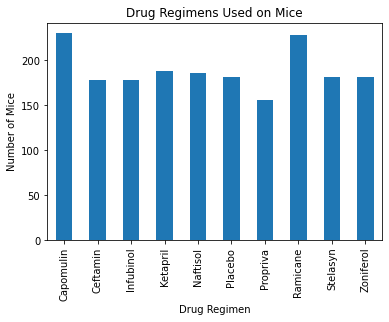

In [243]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
dm_group = clean_mice_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
bp1 = dm_group.plot.bar(align= "center", width= .5)

plt.title("Drug Regimens Used on Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

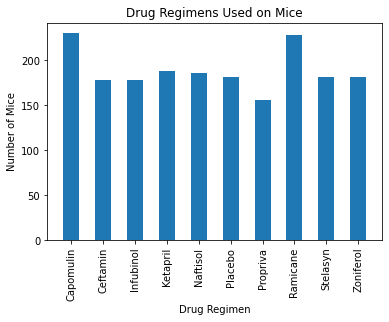

In [244]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

y_axis = dm_group.values
x_axis = np.arange(0,len(y_axis),1)
x = dm_group.index

plt.bar(x, y_axis, align= "center", width= .5)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
plt.xticks(rotation=90)

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Drug Regimens Used on Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

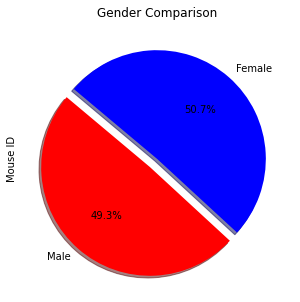

In [245]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_mice_data.groupby(["Sex"]).count()["Mouse ID"]

labels = ["Male", "Female"]

colors = ["red", "blue"]

explode = (0.1, 0)

p1 = gender_group.plot.pie(y='Sex', figsize=(5, 5), labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Gender Comparison")

plt.show()

Text(0.5, 1.0, 'Gender Comparison')

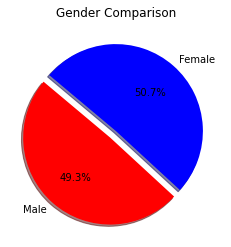

In [246]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

sizes = gender_group.values

colors = ["red", "blue"]

explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Gender Comparison")


## Quartiles, Outliers and Boxplots

In [247]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

final_tp = clean_mice_data.groupby(['Mouse ID',]).Timepoint.max()
final_tp = final_tp.reset_index()
final_tp

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_final =final_tp[["Mouse ID","Timepoint"]].merge(clean_mice_data, on=["Mouse ID","Timepoint"], how='left')

merge_final


four_regimens = merge_final[merge_final["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

#four_regimens


In [248]:
# Put treatments into a list for for loop (and later for plot labels)
four_reg_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_reg_list

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Determine outliers using upper and lower bounds
    
cap= four_regimens.loc[four_regimens['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ram= four_regimens.loc[four_regimens['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
inf= four_regimens.loc[four_regimens['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
cef= four_regimens.loc[four_regimens['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']


#Capomulin IQR

cquartiles = cap.quantile([.25,.5,.75])
clowerq = cquartiles[0.25]
cupperq = cquartiles[0.75]
ciqr = cupperq-clowerq

# cquartiles
# ciqr

print(f"-----------------------------------------------------")  
print(f"Capomulin Regimen") 
print(f"-----------------------------------------------------")  
print(f"Tumor volume quartile calculation is: {round(cquartiles,2)}")
print(f"Tumor volume IQR calculation is: {round(ciqr,2)}")      
   


#Capomulin Outliers

clower_outlier= clowerq-(1.5*iqr)
cupper_outlier= cupperq+(1.5*iqr)

# clower_outlier
# cupper_outlier

print(f"Tumor volumes below {round(clower_outlier,2)} and above {round(cupper_outlier,2)} are considered outliers, within the Capomulin regimen.")


#Ramicane IQR

rquartiles = ram.quantile([.25,.5,.75])
rlowerq = rquartiles[0.25]
rupperq = rquartiles[0.75]
riqr = rupperq-rlowerq

# rquartiles
# riqr


print(f"-----------------------------------------------------")  
print(f"Ramicane Regimen") 
print(f"-----------------------------------------------------") 
print(f"Tumor volume quartile calculation is: {round(rquartiles,2)}")
print(f"Tumor volume IQR calculation is: {round(riqr,2)}")     



#Ramicane Outliers

rlower_outlier= rlowerq-(1.5*iqr)
rupper_outlier= rupperq+(1.5*iqr)

# rlower_outlier
# rupper_outlier

print(f"Tumor volumes below {round(rlower_outlier,2)} and above {round(rupper_outlier,2)} are considered outliers, within the Ramicane regimen.")


#Infubinol IQR

iquartiles = inf.quantile([.25,.5,.75])
ilowerq = iquartiles[0.25]
iupperq = iquartiles[0.75]
iiqr = iupperq-ilowerq

# iquartiles
# iiqr


print(f"-----------------------------------------------------")  
print(f"Infubinol Regimen") 
print(f"-----------------------------------------------------") 
print(f"Tumor volume quartile calculation is: {round(iquartiles,2)}")
print(f"Tumor volume IQR calculation is: {round(iiqr,2)}")       



#Infubinol Outliers

ilower_outlier= ilowerq-(1.5*iqr)
iupper_outlier= iupperq+(1.5*iqr)

# ilower_outlier
# iupper_outlier

print(f"Tumor volumes below {round(ilower_outlier,2)} and above {round(iupper_outlier,2)} are considered outliers, within the Infubinol regimen.")


#Ceftamin IQR

celower_outlier= celowerq-(1.5*iqr)
ceupper_outlier= ceupperq+(1.5*iqr)

# celower_outlier
# ceupper_outlier

cequartiles = cef.quantile([.25,.5,.75])
celowerq = cequartiles[0.25]
ceupperq = cequartiles[0.75]
ceiqr = ceupperq-celowerq

# cequartiles
# ceiqr


print(f"-----------------------------------------------------")  
print(f"Ceftamin Regimen") 
print(f"-----------------------------------------------------") 
print(f"Tumor volume quartile calculation is: {round(cequartiles,2)}")
print(f"Tumor volume IQR calculation is: {round(ceiqr,2)}")     


#Ceftamin Outliers

celower_outlier= celowerq-(1.5*iqr)
ceupper_outlier= ceupperq+(1.5*iqr)

# celower_outlier
# ceupper_outlier

print(f"Tumor volumes below {round(celower_outlier,2)} and above {round(ceupper_outlier,2)} are considered outliers, within the Ceftamin regimen.")


        
    # Locate the rows which contain mice on each drug and get the tumor volumes
four_regimens[['Drug Regimen','Mouse ID', 'Tumor Volume (mm3)']]    
   
    # add subset 
    
four_reg_mice = four_regimens[['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)']] 
#four_reg_mice  
    


    

-----------------------------------------------------
Capomulin Regimen
-----------------------------------------------------
Tumor volume quartile calculation is: 0.25    32.38
0.50    38.13
0.75    40.16
Name: Tumor Volume (mm3), dtype: float64
Tumor volume IQR calculation is: 7.78
Tumor volumes below 20.7 and above 51.83 are considered outliers, within the Capomulin regimen.
-----------------------------------------------------
Ramicane Regimen
-----------------------------------------------------
Tumor volume quartile calculation is: 0.25    31.56
0.50    36.56
0.75    40.66
Name: Tumor Volume (mm3), dtype: float64
Tumor volume IQR calculation is: 9.1
Tumor volumes below 19.89 and above 52.33 are considered outliers, within the Ramicane regimen.
-----------------------------------------------------
Infubinol Regimen
-----------------------------------------------------
Tumor volume quartile calculation is: 0.25    54.05
0.50    60.17
0.75    65.53
Name: Tumor Volume (mm3), dtype: f

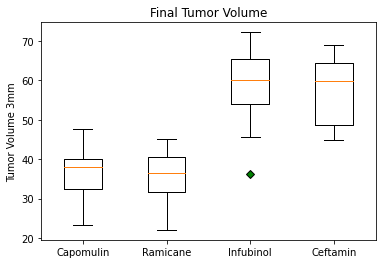

In [249]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

regimens = [cap, ram, inf, cef]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume 3mm')
green_diamond = dict(markerfacecolor='g', marker='D')
ax1.boxplot(regimens, labels=four_reg_list, flierprops=green_diamond)
plt.show()

## Line and Scatter Plots

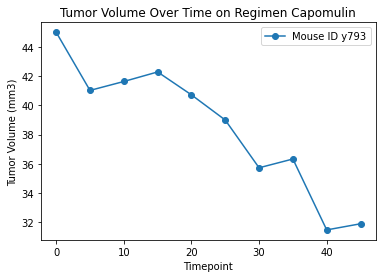

In [250]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_reg = clean_mice_data.loc[clean_mice_data['Drug Regimen'] == 'Capomulin']
mouse = clean_mice_data.loc[clean_mice_data['Mouse ID'] == 'y793']

cap_reg
mouse

x_axis = mouse['Timepoint']
y_axis = mouse['Tumor Volume (mm3)']

mouse_handle, = plt.plot(x_axis, y_axis, marker ='o', label ='Mouse ID y793')

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume Over Time on Regimen Capomulin')
plt.legend(loc="upper right")
plt.show()


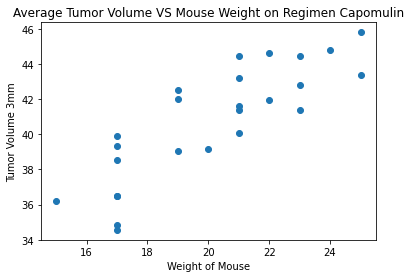

In [251]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_tum = clean_mice_data.loc[clean_mice_data['Drug Regimen'] == 'Capomulin']
cap_mouse_grp = cap_tum.groupby(['Mouse ID'])
cap_mouse_grp.head()

av_cap_vol = cap_mouse_grp['Tumor Volume (mm3)'].mean()
av_cap_vol

cap_weight= cap_mouse_grp['Weight (g)'].mean()
cap_weight.head()

x_values = cap_weight
y_values = av_cap_vol
plt.scatter(x_values,y_values)
plt.xlabel('Weight of Mouse')
plt.ylabel('Tumor Volume 3mm')
plt.title('Average Tumor Volume VS Mouse Weight on Regimen Capomulin')
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708717
The correlation between Tumor Volume and Mouse Weight is 0.84


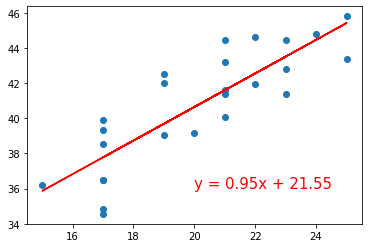

In [252]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation between Tumor Volume and Mouse Weight is {round(rvalue,2)}")
plt.show()